1. What are 3 areas in industry where computer vision is currently being used?
* ***Medical research, diagnostics and public health***
* ***Technology***
* ***Transportation***

2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
* Over fitting is a **modeling error** that occurs when a function corresponds too closely to a particular set od data resulting in a failure to fit additional data and affect the accuracy of predicting future observations.

3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
* ***Cross validation***
* ***Train with more data***
* ***Remove features***
* ***Early Stopping***
* ***Regularization***
* ***Ensembling***

4. Spend 20-minutes reading and clicking through the CNN Explainer website.
    * Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.
    
    
    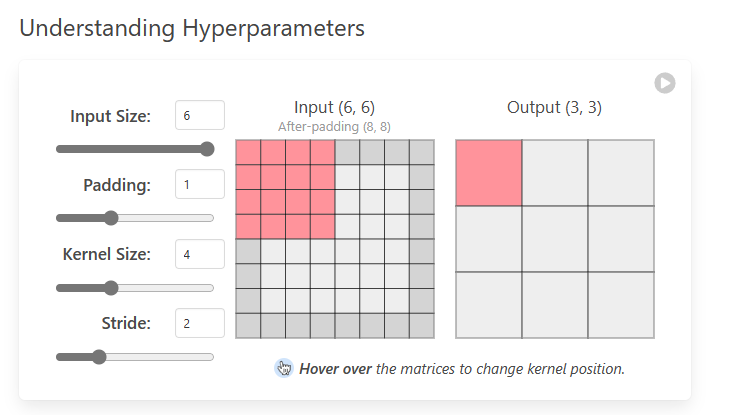

5. Load the `torchvision.datasets.MNIST()` train and test datasets.

In [1]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import torch

train_data= MNIST(root= '../data', train= True, download= True, transform= ToTensor(), target_transform= None)
test_data= MNIST(root= '../data', train= False, download= True, transform= ToTensor(), target_transform= None)

len(train_data), len(test_data)

(60000, 10000)

In [2]:
!nvidia-smi

Mon Aug 28 00:16:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P8     4W /  N/A |    552MiB /  4096MiB |     36%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
torch.cuda.is_available()

True

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


6. Visualize at least 5 different samples of the MNIST training dataset.

In [5]:
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
class_to_indx = train_data.class_to_idx
class_to_indx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [9]:
print(f"Number shape: {image.shape} -> [color_channel, height, width]")
print(f"Label: {class_names[label]}")

Number shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Label: 5 - five


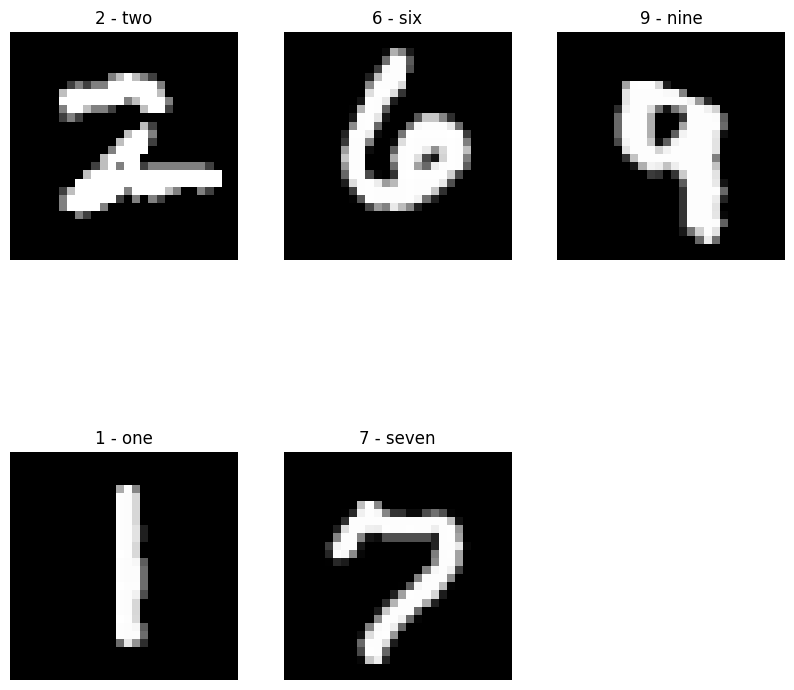

In [10]:
import matplotlib.pyplot as plt 

fig= plt.figure(figsize=(10, 10))
rows, cols = 2, 3

for i in range(1, rows*cols, 1):
    rand_indx= torch.randint(1, len(train_data), size= [1]).item()
    image, label= train_data[rand_indx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader

In [12]:
train_dataloader= DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader= DataLoader(dataset=test_data, batch_size=32, shuffle=False)

8. Recreate `model_2` used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
class MNISTModelV0(torch.nn.Module):
    '''MNIST CNN model to identify the numbers 
    Args:
        input_shape (int): Number of input features.
        output_shape (int): Number of output features.
        hidden_units (int): Number of layers between input and output shape. Default value 10
    '''

    def __init__(self, input_shape: int, output_shape: int, hidden_units= 10) -> None:
        super().__init__()
        self.convo_layer_1= torch.nn.Sequential(
            torch.nn.Conv2d(in_channels= input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.convo_layer_2= torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classification_layer= torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x= self.convo_layer_1(x)
        # print(f"Shape after layer 1: {x.shape}")
        x= self.convo_layer_2(x)
        # print(f"Shape after layer 2: {x.shape}")
        x= self.classification_layer(x)
        # print(f"Shape after layer 3: {x.shape}")
        return x

In [14]:
model_on_CPU = MNISTModelV0(input_shape=1, output_shape= len(class_names), hidden_units=10)
model_on_GPU = MNISTModelV0(input_shape=1, output_shape= len(class_names), hidden_units=10).to(device)

9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
import torchmetrics
from tqdm import tqdm

loss_fn= torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_on_CPU.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task='multiclass', num_classes= len(class_names))

C:\Users\Kushagra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [16]:
from timeit import default_timer as timer

def print_training_time(start: float, end= float, device: torch.device= device):
    '''Prints difference between start and end time.'''
    
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [17]:
def train_step(model: torch.nn.Module, 
               dataloader: DataLoader, 
               loss_fn: torch.nn, 
               optimizer: torch.optim, 
               accuracy_fn: torchmetrics.Accuracy, 
               device= device):
    
    '''Function to train model in batches'''
    model.to(device).train()
    train_loss, train_acc= 0, 0

    for batch, (X,y) in enumerate(dataloader):
        # Put data on the same device
        X, y= X.to(device), y.to(device)

        # 1. Forward Pass
        y_pred= model(X)

        # 2. loss and acc calculations
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn.to(device)(y_pred.argmax(dim=1), y)

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. backward loss
        loss.backward()

        # 5. Optimizer Step
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {100*train_acc:.2f}%")


In [18]:
def test_step(model: torch.nn.Module,
              dataloader: DataLoader,
              loss_fn: torch.nn,
              accuracy_fn: torchmetrics.Accuracy,
              device= device
              ):
    
    '''Function to test the model in batches'''
    model.to(device).eval()
    test_loss, test_acc= 0, 0

    with torch.inference_mode():
        for X,y in dataloader:
            X, y= X.to(device), y.to(device)

            # 1. Forward Pass
            test_preds= model(X)

            # 2. loss and accuracy calculation
            loss = loss_fn(test_preds, y)
            test_loss += loss 
            test_acc += accuracy_fn.to(device)(test_preds.argmax(dim=1), y)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.4f} | Test Accuracy: {100*test_acc:.2f}%")

In [19]:
epochs= 5
model_start_training_time= timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------------------------------")
    train_step(model=model_on_CPU,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device='cpu')
    test_step(model=model_on_CPU,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device='cpu')
    
model_end_training_time= timer()
model_total_training_time= print_training_time(start=model_start_training_time,
                                               end=model_end_training_time,
                                               device='cpu')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------------------------------------
Train Loss: 0.3429 | Train Accuracy: 88.74%


 20%|██        | 1/5 [00:28<01:55, 28.76s/it]

Test loss: 0.0732 | Test Accuracy: 97.70%
Epoch: 1
----------------------------------------
Train Loss: 0.0706 | Train Accuracy: 97.83%


 40%|████      | 2/5 [00:57<01:26, 28.72s/it]

Test loss: 0.0547 | Test Accuracy: 98.19%
Epoch: 2
----------------------------------------
Train Loss: 0.0554 | Train Accuracy: 98.28%


 60%|██████    | 3/5 [01:25<00:56, 28.28s/it]

Test loss: 0.0492 | Test Accuracy: 98.36%
Epoch: 3
----------------------------------------
Train Loss: 0.0464 | Train Accuracy: 98.53%


 80%|████████  | 4/5 [01:53<00:28, 28.33s/it]

Test loss: 0.0505 | Test Accuracy: 98.38%
Epoch: 4
----------------------------------------
Train Loss: 0.0411 | Train Accuracy: 98.68%


100%|██████████| 5/5 [02:21<00:00, 28.37s/it]

Test loss: 0.0599 | Test Accuracy: 98.09%
Train time on cpu: 141.842 seconds


In [20]:
epochs= 5
model_start_training_time= timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------------------------------")
    train_step(model=model_on_GPU,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer= torch.optim.SGD(model_on_GPU.parameters(), lr=0.1),
               accuracy_fn=accuracy_fn,
               device= device)
    test_step(model=model_on_GPU,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device= device)
    
model_end_training_time= timer()
model_total_training_time= print_training_time(start=model_start_training_time,
                                               end=model_end_training_time,
                                               device= device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------------------------------------
Train Loss: 0.2609 | Train Accuracy: 91.50%


 20%|██        | 1/5 [00:18<01:13, 18.32s/it]

Test loss: 0.0725 | Test Accuracy: 97.58%
Epoch: 1
----------------------------------------
Train Loss: 0.0739 | Train Accuracy: 97.74%


 40%|████      | 2/5 [00:33<00:49, 16.56s/it]

Test loss: 0.0568 | Test Accuracy: 98.28%
Epoch: 2
----------------------------------------
Train Loss: 0.0579 | Train Accuracy: 98.22%


 60%|██████    | 3/5 [00:49<00:32, 16.36s/it]

Test loss: 0.0481 | Test Accuracy: 98.43%
Epoch: 3
----------------------------------------
Train Loss: 0.0488 | Train Accuracy: 98.44%


 80%|████████  | 4/5 [01:05<00:16, 16.12s/it]

Test loss: 0.0471 | Test Accuracy: 98.32%
Epoch: 4
----------------------------------------
Train Loss: 0.0430 | Train Accuracy: 98.65%


100%|██████████| 5/5 [01:21<00:00, 16.29s/it]

Test loss: 0.0452 | Test Accuracy: 98.41%
Train time on cuda: 81.448 seconds


10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [21]:
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn: torchmetrics.Accuracy,
               device:  torch.device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    # Make predictions
    model.to(device).eval()

    with torch.inference_mode():
        for X,y in tqdm(dataloader):
            # Make predictions
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_pred.argmax(dim=1), y) 
        
        # Scale the loss and accuracy to find the average loss and accuracy per batch
        loss /= len(dataloader)
        acc /= len(dataloader) 

    return {'model_name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_accuracy':100*acc.cpu().numpy()}

In [22]:
model_on_CPU_results= eval_model(model= model_on_CPU,
                                 dataloader= test_dataloader,
                                 loss_fn= loss_fn,
                                 accuracy_fn= accuracy_fn,
                                 device= 'cpu')

model_on_CPU_results

100%|██████████| 313/313 [00:02<00:00, 118.27it/s]


{'model_name': 'MNISTModelV0',
 'model_loss': 0.05989455431699753,
 'model_accuracy': 98.0930507183075}

In [23]:
model_on_GPU_results= eval_model(model= model_on_GPU,
                                 dataloader= test_dataloader,
                                 loss_fn= loss_fn,
                                 accuracy_fn= accuracy_fn,
                                 device= device)

model_on_GPU_results

100%|██████████| 313/313 [00:01<00:00, 167.38it/s]


{'model_name': 'MNISTModelV0',
 'model_loss': 0.04515994340181351,
 'model_accuracy': 98.41253757476807}

11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [24]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [25]:
model_on_GPU.to(device).eval()
test_loss, test_acc= 0, 0
y_preds= []

for X, y in tqdm(test_dataloader):
    with torch.inference_mode():
        X, y= X.to(device), y.to(device)

        y_logits= model_on_GPU(X)

        y_pred = torch.softmax(y_logits.squeeze() , dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor= torch.cat(y_preds)
y_pred_tensor

100%|██████████| 313/313 [00:01<00:00, 172.95it/s]


tensor([7, 2, 1,  ..., 4, 5, 6])

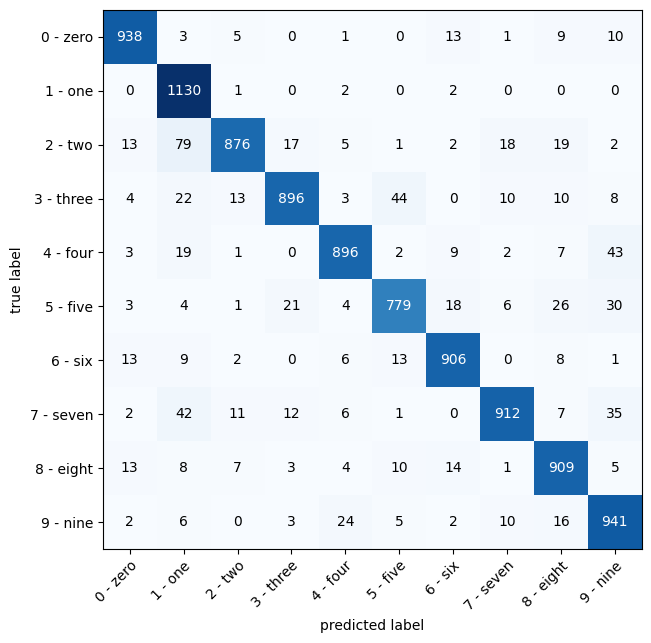

In [26]:
# 2. Setup a confusion matrix 
confmat = ConfusionMatrix(task='multiclass', num_classes= len(class_names))
confmat_tensor = confmat(preds= y_pred_tensor,target= test_data.targets)

# 3. Plot the conusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names= class_names,
    figsize= (10,7)
)

12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [27]:
random_tensor= torch.rand(size=(1, 3, 64, 64))
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [28]:
Conv2d_layer= torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=13, stride=2, padding=0)
print(f"Random Tensor Shape: {random_tensor.shape}")
print(f"Random Tensor through convo layer shape: {Conv2d_layer(random_tensor).shape}")

Random Tensor Shape: torch.Size([1, 3, 64, 64])
Random Tensor through convo layer shape: torch.Size([1, 64, 26, 26])


13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test `torchvision.datasets.FashionMNIST` dataset.

In [29]:
import torchvision
fashion_MNIST_train= torchvision.datasets.FashionMNIST(root='../data',
                                                      train= True,
                                                      transform= torchvision.transforms.ToTensor())
fashion_MNIST_test= torchvision.datasets.FashionMNIST(root='../data',
                                                      train= False,
                                                      transform= torchvision.transforms.ToTensor())

len(fashion_MNIST_train), len(fashion_MNIST_test)

(60000, 10000)

In [30]:
fashion_MNIST_class_names= fashion_MNIST_train.classes
fashion_MNIST_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
fashion_MNIST_train_dataloader= DataLoader(dataset=fashion_MNIST_train,
                                           batch_size=32,
                                           shuffle= True)
fashion_MNIST_test_dataloader= DataLoader(dataset=fashion_MNIST_test,
                                          batch_size=32,
                                          shuffle= False)

In [36]:
epochs= 5
start= timer()
model_FASHION_MNIST= MNISTModelV0(input_shape=1, output_shape=len(fashion_MNIST_class_names), hidden_units=20)
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------------------------------")

    train_step(model=model_FASHION_MNIST,
               dataloader=fashion_MNIST_train_dataloader,
               loss_fn=loss_fn,
               optimizer= torch.optim.SGD(params=model_FASHION_MNIST.parameters(), lr=0.1),
               accuracy_fn= torchmetrics.Accuracy(task='multiclass', num_classes=len(fashion_MNIST_class_names)),
               device=device)
    test_step(model=model_FASHION_MNIST,
              dataloader=fashion_MNIST_test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=torchmetrics.Accuracy(task='multiclass', num_classes=len(fashion_MNIST_class_names)),
              device=device)
end= timer()
total_training_time= print_training_time(start, end, device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------------------------------------
Train Loss: 0.5248 | Train Accuracy: 81.14%


 20%|██        | 1/5 [00:15<01:02, 15.59s/it]

Test loss: 0.3454 | Test Accuracy: 87.70%
Epoch: 1
----------------------------------------
Train Loss: 0.3155 | Train Accuracy: 88.82%


 40%|████      | 2/5 [00:30<00:46, 15.43s/it]

Test loss: 0.3050 | Test Accuracy: 89.40%
Epoch: 2
----------------------------------------
Train Loss: 0.2783 | Train Accuracy: 90.27%


 60%|██████    | 3/5 [00:46<00:30, 15.41s/it]

Test loss: 0.2848 | Test Accuracy: 89.81%
Epoch: 3
----------------------------------------
Train Loss: 0.2538 | Train Accuracy: 90.94%


 80%|████████  | 4/5 [01:01<00:15, 15.40s/it]

Test loss: 0.2893 | Test Accuracy: 89.39%
Epoch: 4
----------------------------------------
Train Loss: 0.2408 | Train Accuracy: 91.42%


100%|██████████| 5/5 [01:17<00:00, 15.40s/it]

Test loss: 0.2580 | Test Accuracy: 90.82%
Train time on cuda: 77.024 seconds


In [37]:
model_on_GPU.to(device).eval()
test_loss, test_acc= 0, 0
y_preds= []

for X, y in tqdm(fashion_MNIST_test_dataloader):
    with torch.inference_mode():
        X, y= X.to(device), y.to(device)

        y_logits= model_on_GPU(X)

        y_pred = torch.softmax(y_logits.squeeze() , dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor= torch.cat(y_preds)
y_pred_tensor

100%|██████████| 313/313 [00:01<00:00, 205.96it/s]


tensor([9, 2, 1,  ..., 8, 1, 4])

In [39]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(y_pred_tensor != fashion_MNIST_test.targets)[0]
len(wrong_pred_indexes)

2034

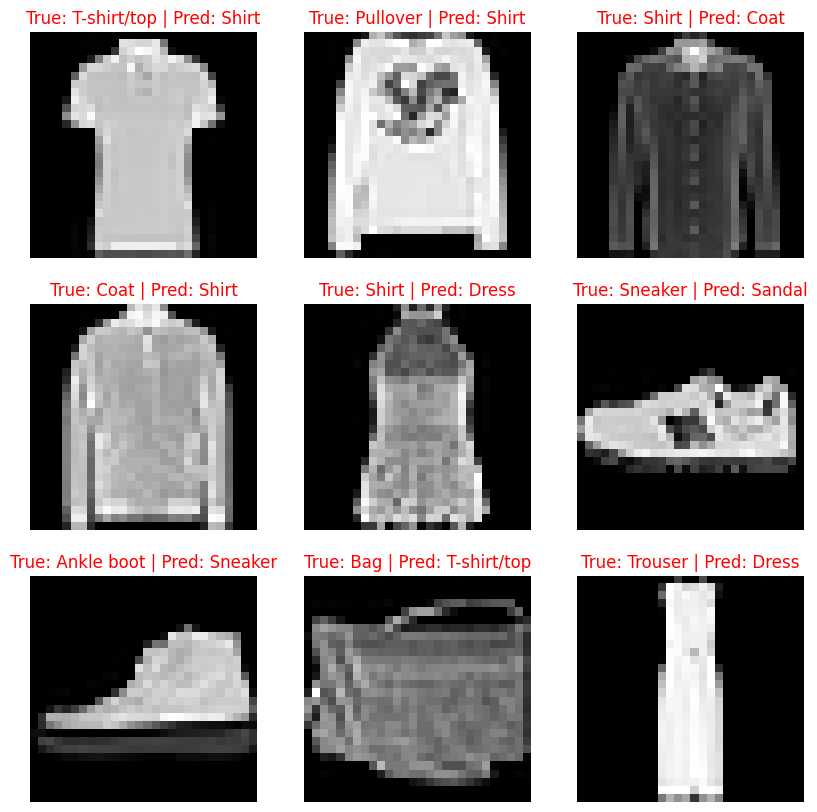

In [40]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_MNIST_class_names[fashion_MNIST_test[idx][1]]
  pred_label = fashion_MNIST_class_names[y_pred_tensor[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_MNIST_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);